# Old Faithful Eruptions: Linear Regression Mini Project

In this project, I will look at the relationship between eruption duration and the waiting time until the next eruption.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter("ignore")


1) Load the data

In [12]:
# Load the Old Faithful dataset from R datasets
import statsmodels.api as sm
faithful = sm.datasets.get_rdataset("faithful", "datasets").data

faithful.to_csv("faithful.csv", index=False)
eruptions = faithful.rename(columns={
    "eruptions": "duration", #this column represents the duration of the eruption (minutes)
    "waiting": "wait" #this column represents the waiting time until the next eruption (minutes)
})


eruptions.head()


,duration,wait
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


2) I will plot (scatter plot) duration vs wait to see if the relationship looks roughly linear.

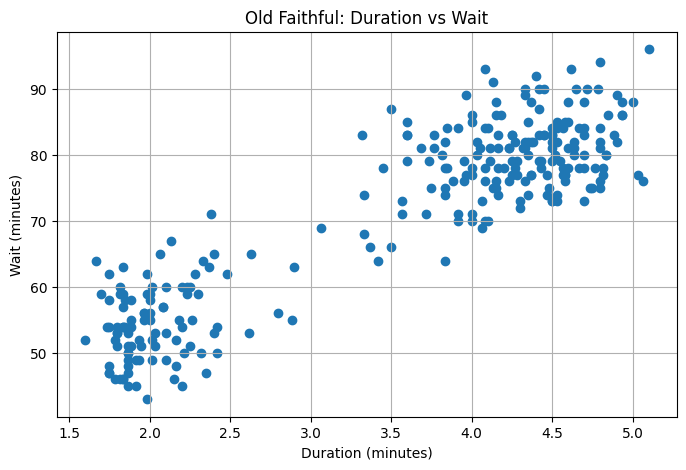

In [13]:
plt.figure(figsize=(8, 5))
plt.scatter(eruptions["duration"], eruptions["wait"])
plt.xlabel("Duration (minutes)")
plt.ylabel("Wait (minutes)")
plt.title("Old Faithful: Duration vs Wait")
plt.grid(True)
plt.show()

3) Next I convert both columns to standard units so correlation/regression is easier to interpret.

In [14]:
def standard_units(x):
    return (x - np.average(x)) / np.std(x)

duration_su = standard_units(eruptions["duration"])
wait_su = standard_units(eruptions["wait"])

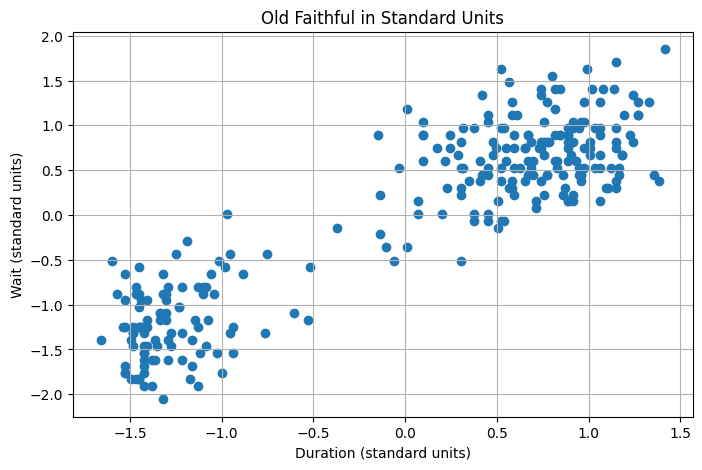

Mean for Duration: 3.4877830882352936
Mean for Wait: 70.8970588235294
Standard deviation for Duration: 1.1392712102257678
Standard deviation for Wait: 13.569960017586368


,duration (standard units),wait (standard units)
0,0.098499,0.597123
1,-1.481459,-1.245181
2,-0.135861,0.228663
3,-1.057503,-0.655644
4,0.917443,1.039277


In [15]:
plt.figure(figsize=(8, 5))
plt.scatter(duration_su, wait_su)
plt.xlabel("Duration (standard units)")
plt.ylabel("Wait (standard units)")
plt.title("Old Faithful in Standard Units")
plt.grid(True)
plt.show()


duration_mean = np.mean(eruptions["duration"])
duration_std = np.std(eruptions["duration"])
wait_mean = np.mean(eruptions["wait"])
wait_std = np.std(eruptions["wait"])
print("Mean for Duration:", duration_mean)
print("Mean for Wait:", wait_mean)
print("Standard deviation for Duration:", duration_std)
print("Standard deviation for Wait:", wait_std)

faithful_standard = pd.DataFrame({
    "duration (standard units)": duration_su,
    "wait (standard units)": wait_su
})
faithful_standard.head()


4) Now I compute the correlation coefficient r between duration and wait.

In [16]:
def correlation(df, x, y):
    x_stdu = standard_units(df[x])
    y_stdu = standard_units(df[y])
    return np.average(x_stdu * y_stdu)

r = correlation(eruptions, "duration", "wait")
r

np.float64(0.9008111683218135)

5) I use r to compute the slope of the regression line in original units, and then compute its intercept.


In [17]:
slope = r * (wait_std / duration_std)
intercept = wait_mean - slope * duration_mean

print("Slope:", slope)
print("Intercept:", intercept)

Slope: 10.72964139513353
Intercept: 33.47439702275334


6) Now I will use the line to predict wait time for 2 simple examples: a 2-minute eruption and a 5-minute eruption.

In [18]:
wait_2min = slope * 2 + intercept
wait_5min = slope * 5 + intercept

print("Predicted wait time for 2 minutes:", wait_2min)
print("Predicted wait time for 5 minutes:", wait_5min)


Predicted wait time for 2 minutes: 54.9336798130204
Predicted wait time for 5 minutes: 87.12260399842098


7) Finally I plot residuals to see if a straight line seems reasonable (no strong curve pattern).

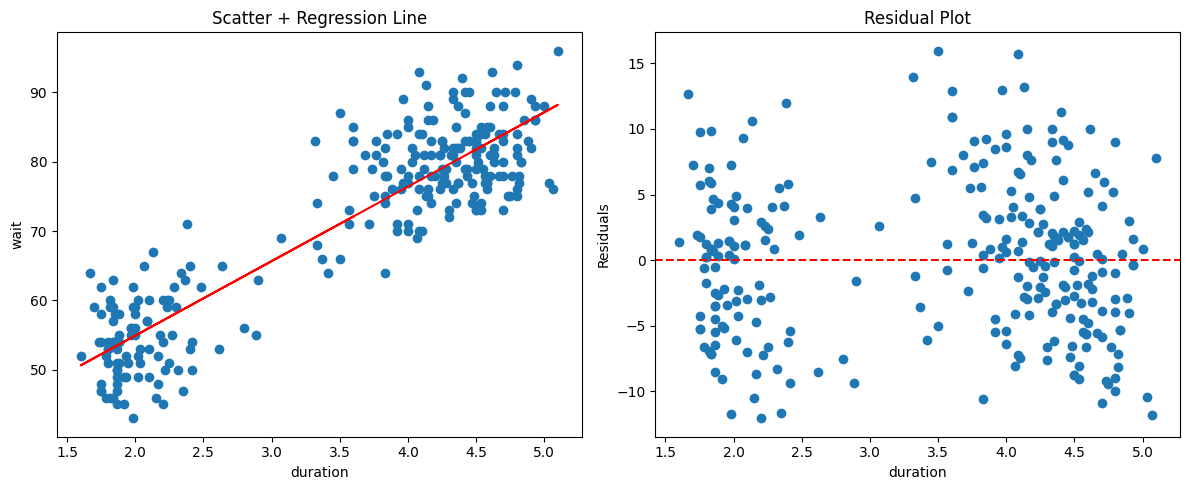

In [19]:
def plot_least_squares_and_residuals(df, x_col, y_col):
    x = df[x_col]
    y = df[y_col]

    # least squares line
    m, b = np.polyfit(x, y, 1)

    # residuals
    residuals = y - (m * x + b)
    plt.figure(figsize=(12, 5))

    # scatter + regression
    plt.subplot(1, 2, 1)
    plt.scatter(x, y)
    plt.plot(x, m * x + b, color="red")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title("Scatter + Regression Line")

    # residuals plot
    plt.subplot(1, 2, 2)
    plt.scatter(x, residuals)
    plt.axhline(y=0, color="red", linestyle="--")
    plt.xlabel(x_col)
    plt.ylabel("Residuals")
    plt.title("Residual Plot")

    plt.tight_layout()
    plt.show()

plot_least_squares_and_residuals(eruptions, "duration", "wait")

8) Regression diagnostics: In this section I check whether a linear model is a reasonable fit for this
data. I look at different plots of the residuals to see if there is any clear
pattern or shape that would suggest the regression line is not capturing the
main structure of the data. I also include a QQ plot to see whether the
residuals are roughly normal, which is one of the usual assumptions in linear
regression.


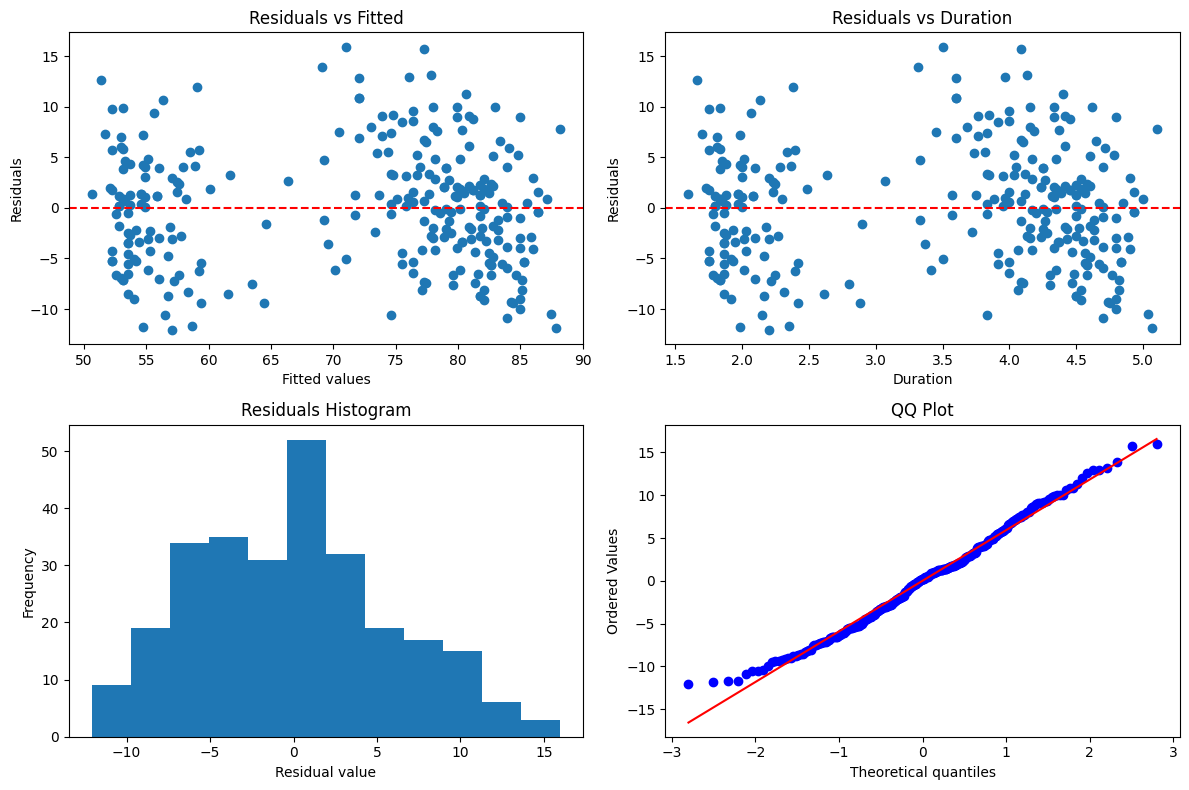

In [20]:
import scipy.stats as stats


fitted = slope * eruptions["duration"] + intercept #fitted values from the regression line
residuals = eruptions["wait"] - fitted
plt.figure(figsize=(12, 8))

# Residuals vs fitted
plt.subplot(2, 2, 1)
plt.scatter(fitted, residuals)
plt.axhline(0, linestyle="--", color="red")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")

# Residuals vs duration (x)
plt.subplot(2, 2, 2)
plt.scatter(eruptions["duration"], residuals)
plt.axhline(0, linestyle="--", color="red")
plt.xlabel("Duration")
plt.ylabel("Residuals")
plt.title("Residuals vs Duration")

# Histogram of residuals (should look like it follows a normal dist.)
plt.subplot(2, 2, 3)
plt.hist(residuals, bins=12)
plt.xlabel("Residual value")
plt.ylabel("Frequency")
plt.title("Residuals Histogram")

# QQ plot
plt.subplot(2, 2, 4)
stats.probplot(residuals, plot=plt)
plt.title("QQ Plot")

plt.tight_layout()
plt.show()


## 9. Conclusion
From the scatter plot, the relationship between eruption duration and waiting
time looks positive and fairly strong, because the points move upward in a way
that is mostly linear. The regression line follows this pattern well, and the
predictions for the example durations make sense compared to the data.

In the residuals vs fitted values and residuals vs duration plots, there is no
clear curve or funnel shape, and the residuals are mostly spread around zero,
which suggests that the linear model is not obviously missing a pattern. The
histogram and QQ plot show that the residuals are roughly symmetric and close
to normal, with some deviations at the ends, which is common in real data.

This analysis does not prove a causal relationship, but it does show a strong
association between eruption duration and waiting time. Based on the plots and
diagnostics, a linear model seems like a reasonable way to describe this
relationship, even if it is not perfect.